In [1]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

In [2]:
# Open the first TIFF file
with rasterio.open("/shared_space/ACV/nlcd_nc0.1.tif") as src1:
    nlcd_data = src1.read(1)  # Read the first band

# Open the second TIFF file
with rasterio.open("/shared_space/ACV/inter_files/output_file.tif") as src2:
    output_data = src2.read(1)  # Read the first band


In [7]:
import rasterio
from rasterio.enums import Resampling

# Open both rasters
with rasterio.open("/shared_space/ACV/nlcd_nc0.1.tif") as src1:
    nlcd_data = src1.read(1)  # Read the first band
    metadata = src1.meta  # Get the metadata of the first raster

# Open the second raster
with rasterio.open("/shared_space/ACV/inter_files/output_file.tif") as src2:
    output_data = src2.read(1)  # Read the first band

    # Resample the second raster to match the first one
    output_resampled = src2.read(
        1,
        out_shape=(src1.count, nlcd_data.shape[0], nlcd_data.shape[1]),
        resampling=Resampling.nearest  # Use nearest neighbor for resampling
    )

# Now you can compare the resampled output_data with nlcd_data
condition_nlcd = np.isin(nlcd_data, [21, 22, 23, 24]) #urban Land type 
condition_output = output_resampled > 20 #wind speed of atleast 20m/s

# Combine the conditions to find the overlap
result = condition_nlcd & condition_output



In [8]:
# Create a new output file to save the result
output_path = "combined_result_test.tif"

# Get the metadata from the first raster to maintain the same shape and georeferencing
with rasterio.open("/shared_space/ACV/nlcd_nc0.1.tif") as src1:
    metadata = src1.meta

# Update the metadata to store boolean values (0 or 1) for the result
metadata.update(dtype=rasterio.uint8, count=1)

# Write the result to the new file
with rasterio.open(output_path, 'w', **metadata) as dst:
    dst.write(result.astype(rasterio.uint8), 1)


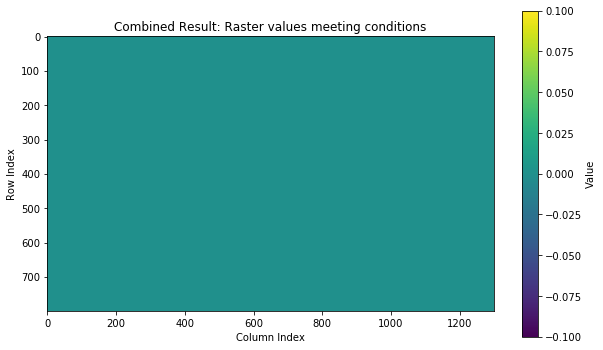

In [9]:
import geopandas as gpd

#import geodatasets
import contextily as cx

# Open the combined_result.tif file
with rasterio.open("combined_result_test.tif") as src:
    combined_result_data = src.read(1)  # Read the first band (the result)
    metadata = src.meta  # Get metadata for the raster (for axis and georeferencing)
#cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
# Plot the combined result
plt.figure(figsize=(10, 6))
plt.imshow(combined_result_data, cmap='viridis', interpolation='none')
plt.colorbar(label='Value')
plt.title('Combined Result: Raster values meeting conditions')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater


ValueError: operands could not be broadcast together with shapes (800,1300) (159,279) 